<div style='display:flex; justify-content: space-evenly; align-items: center;'>
    <div><img src='../images.png'/></div>    
    <div><h2 style='text-align:center'>Université Sultan Moulay Slimane</h2><h2 style='text-align:center'>Ecole Supérieure de Technologie</h2><h2 style='text-align:center'>Fkih Ben Salah</h2></div>   
    <div><img src='../images.png'/></div>
</div>

<h1 style='text-align:center'>Mini-Projet</h1>

<h2 style='text-align:center'>Module : Programmation Python</h2>

<h3 style='text-align:center'>Filière LP- BIG DATA, Semestre : 5, AU : 2023-2024<h3>

<h2>Travail N°1 :</h2>

<h3>Partie 1</h3>

**Période d’étude : Du 1er novembre 2013 au 28 février 2015** <br/><br/>
On se basant sur les données de transactions effectuées par les clients sur le site e-commerce, et
qui sont enregistrées dans les fichiers (les deux fichiers : dataset_P1(Nov2013-June2014).csv et
dataset_P2(July2014-January2015) :

Importation des Bilblioteques

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

**1. Faire les traitements nécessaires pour charger et fusionner les fichiers.**

Premièrement en recuperer les données de la période d’étude : Nov2013-June2014

In [2]:
df_2013_2014 = pd.read_csv("../../dataset_P1(Nov2013-June2014).csv", delimiter=";", index_col="Customer_ID" , decimal=',')

Deuxièmement en recuperer les données de la période d’étude : July2014-January2015

In [3]:
df_2014_2015= pd.read_csv("../../dataset_P2(July2014-January2015).csv", delimiter=";", index_col="Customer_ID" , decimal=',')
df_2014_2015.columns = ["Date_purchase", "Price"]

Troisièmement en fait la fusion de donnees 

In [4]:
df = pd.concat([df_2013_2014,df_2014_2015])
df

,Date_purchase,Price
Customer_ID,,
1,02/11/2013,"69,5"
2,04/11/2013,350
3,05/11/2013,"69,99"
4,07/11/2013,120
5,07/11/2013,120
...,...,...
1715,26/08/2014,301.0
1715,31/10/2014,35.0
1715,27/09/2014,35.0


**2. Pour chaque colonne donner le nombre de valeurs manquantes.**

En va utilisé isnull() et sum() pour évaluer la qualité des données en comptant les valeurs nulles dans chaque colonne

In [5]:
df.isnull().sum()

Date_purchase    15
Price            12
dtype: int64

**3. Afficher un data frame avec toutes les lignes qui ont au moins une valeur manquante.**

isna() et any(axis=1) en recuperer les lignes du DataFrame avec les valeurs nulles 

In [6]:
df[df.isna().any(axis=1)]

,Date_purchase,Price
Customer_ID,,
36,NaN,784
57,01/12/2013,NaN
64,NaN,NaN
74,NaN,444
77,01/03/2014,NaN
81,NaN,343
94,NaN,NaN
104,NaN,97
113,NaN,48


**4. Supprimer ensuite toutes les lignes avec des valeurs manquantes.**

En utilise dropna() pour supprime toutes les lignes du DataFrame qui contiennent au moins une valeur nulle

In [7]:
new_df = df.dropna()
new_df.isnull().sum()

Date_purchase    0
Price            0
dtype: int64

In [8]:
new_df["Price"]=pd.to_numeric(new_df["Price"], downcast='float',errors='coerce')
new_df["Price"].isnull().sum()

C:\Users\Achraf\AppData\Local\Temp\ipykernel_5588\2761296505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Price"]=pd.to_numeric(new_df["Price"], downcast='float',errors='coerce')


9

In [9]:
new_df = new_df.dropna()

**5. Vérifier les dates des transactions afin de garder que celles qui sont effectuées par
les clients dans la période d’étude.**

Afin de conserver les dates conformes à la période d'étude, Il est essentiel de vérifiez le type de données de la colonne "Date_purchase" pour assurer qu'il s'agit d'une date, puis supprimez les valeurs non valides.

In [10]:
dates = pd.to_datetime(new_df["Date_purchase"], format="%d/%m/%Y",errors='coerce')
new_df[dates.isna()]


,Date_purchase,Price
Customer_ID,,
180,#######,390.0
187,#######,179.0
194,#######,131.0
203,#######,306.0
228,#######,267.0
261,#######,79.0


In [11]:
new_df['Date_purchase']= dates
new_df = new_df.dropna()
new_df

,Date_purchase,Price
Customer_ID,,
2,2013-11-04,350.0
4,2013-11-07,120.0
5,2013-11-07,120.0
6,2013-11-07,120.0
7,2013-11-07,69.0
...,...,...
1715,2014-08-26,301.0
1715,2014-10-31,35.0
1715,2014-09-27,35.0


In [12]:
premier_etude = datetime(2013, 11, 1)
deuxieme_etude =datetime(2015, 2, 28)
puchase_in_period = (new_df["Date_purchase"] >= premier_etude) & (new_df["Date_purchase"] <= deuxieme_etude)
new_df = new_df[puchase_in_period]
new_df

,Date_purchase,Price
Customer_ID,,
2,2013-11-04,350.0
4,2013-11-07,120.0
5,2013-11-07,120.0
6,2013-11-07,120.0
7,2013-11-07,69.0
...,...,...
1715,2014-08-26,301.0
1715,2014-10-31,35.0
1715,2014-09-27,35.0


**6. Afficher les statistiques descriptives de base.**

In [13]:
new_df.describe()

,Date_purchase,Price
count,12686,12686.000000
mean,2014-06-11 18:33:12.117294592,392.758331
min,2013-11-01 00:00:00,29.000000
25%,2014-03-05 00:00:00,150.000000
50%,2014-06-15 00:00:00,297.000000
75%,2014-09-23 18:00:00,522.000000
max,2015-01-29 00:00:00,29000.000000
std,NaN,511.112091


**7. Vérifier s’il y a des valeurs aberrantes dans la colonne Price, si oui comment vous pouvez
expliquer l’existence de ces valeurs généralement ? quelle sera votre approche pour traiter
ces valeurs** ?

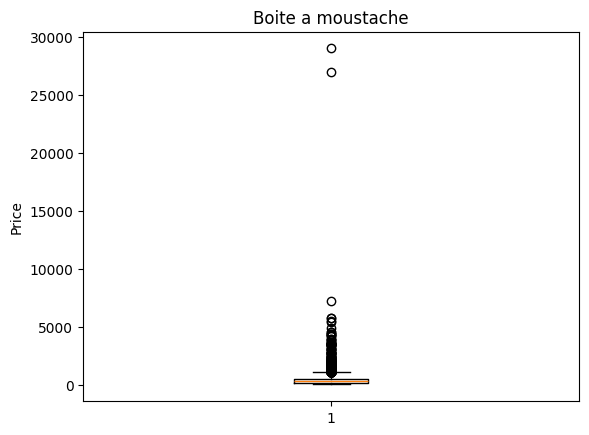

In [14]:
plt.boxplot(new_df["Price"])
plt.title('Boite a moustache')
plt.ylabel('Price')
plt.show()

In [15]:
df

,Date_purchase,Price
Customer_ID,,
1,02/11/2013,"69,5"
2,04/11/2013,350
3,05/11/2013,"69,99"
4,07/11/2013,120
5,07/11/2013,120
...,...,...
1715,26/08/2014,301.0
1715,31/10/2014,35.0
1715,27/09/2014,35.0


**8. Quel est le mois qui a enregistré le plus grand nombre de ventes ? et quel est le montant
total de ce mos ?**?

In [16]:
months = new_df["Date_purchase"].dt.month
fst_mounth = new_df.groupby([months])["Price"].count().idxmax()
montant_fst_month = new_df.groupby([months])["Price"].sum().loc[fst_mounth]
print("le mois qui a enregistré le plus grand nombre de ventes: ",fst_mounth)
print("le montant total de ce mois : ", montant_fst_month)

le mois qui a enregistré le plus grand nombre de ventes:  11
le montant total de ce mois :  670434.5


**9. Afficher un graphe qui montre l’évolution du montant total par mois**

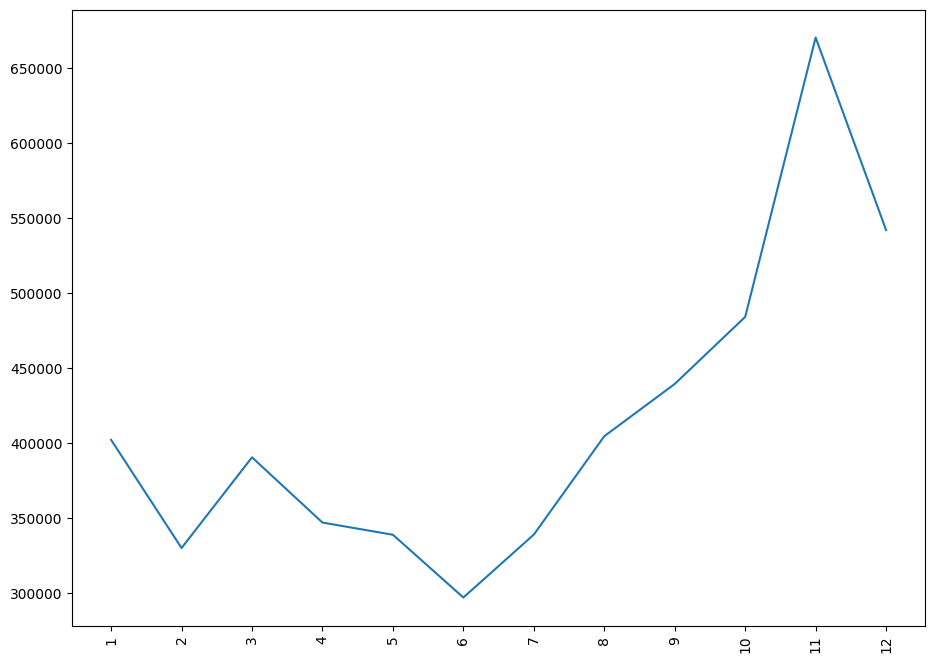

In [17]:
prices_dates = new_df.groupby([months])["Price"].sum()
ind_dates = prices_dates.index
plt.figure(figsize=(11,8))
plt.plot( list(ind_dates.map(lambda x: str(x) )), prices_dates.values)
plt.xticks(rotation=90)
plt.show()

**10. Pour chaque client, Créer les variables suivantes :**

a. Fréquence : Nombre de transactions observées au cours de la période analysée.

In [18]:
client_data = new_df.groupby(["Customer_ID"])
freq = client_data.agg({"Date_purchase":'count'})
freq.rename(columns={"Date_purchase" : "Frequence"} , inplace=True)
freq

,Frequence
Customer_ID,
2,1
4,1
5,1
6,1
7,1
...,...
1715,12
1716,5
1717,2


b. Récence : le nombre de jours entre le premier jour de la période d'étude et le jour
du dernier achat.

In [19]:
first_date = new_df["Date_purchase"].min()
recence = client_data.agg({"Date_purchase":'max'}) - first_date
recence.rename(columns={"Date_purchase" : "Recence"} , inplace=True)
recence


,Recence
Customer_ID,
2,3 days
4,6 days
5,6 days
6,6 days
7,6 days
...,...
1715,405 days
1716,155 days
1717,92 days


c. Longueur : nombre de jours entre le premier et le dernier achat (Longueur de la
relation client/site e-commerce)

In [20]:
longueur = client_data.agg({"Date_purchase":'max'}) - client_data.agg({"Date_purchase":'min'})
longueur.rename(columns={'Date_purchase' :'Longeur'}, inplace=True)
longueur

,Longeur
Customer_ID,
2,0 days
4,0 days
5,0 days
6,0 days
7,0 days
...,...
1715,399 days
1716,44 days
1717,9 days


d. Montant : le montant total dépensé par le client au cours de la période analysée.
(MAD)

In [21]:
montant_client = client_data.agg({'Price':'sum'})
montant_client.rename(columns={'Price':'Montant'}, inplace=True)
montant_client

,Montant
Customer_ID,
2,350.0
4,120.0
5,120.0
6,120.0
7,69.0
...,...
1715,2616.0
1716,2888.0
1717,1380.0


e. NbrP1 : indique le nombre des transactions observées dans la première période.


In [22]:
premier_period = datetime(2014,7 ,1)
condition_premier_period =(new_df["Date_purchase"] < premier_period)
NbrP1 = new_df.loc[condition_premier_period].groupby("Customer_ID").agg({'Date_purchase':'count'})
NbrP1.rename(columns={'Date_purchase' : 'NbrP1'} , inplace=True)
NbrP1

,NbrP1
Customer_ID,
2,1
4,1
5,1
6,1
7,1
...,...
1713,2
1714,5
1715,6


f. NbrP2 : indique le nombre des transactions observées dans la deuxième période.


In [23]:
premier_period = datetime(2014,7 ,1)
condition_premier_period =(new_df["Date_purchase"] > premier_period)
NbrP2 = new_df.loc[condition_premier_period].groupby("Customer_ID").agg({'Date_purchase':'count'})
NbrP2.rename(columns={'Date_purchase' : 'NbrP2'} , inplace=True)
NbrP2

,NbrP2
Customer_ID,
27,1
35,1
43,1
58,19
66,11
...,...
1711,1
1713,1
1715,6


g. Inter_achat : Nombre moyen de jours entre les achats.

In [24]:
inter_achat = pd.DataFrame((longueur["Longeur"] / (freq["Frequence"] - 1)), columns=["Inter_Achat"])
inter_achat["Inter_Achat"].fillna(pd.Timedelta(0), inplace=True)
inter_achat

,Inter_Achat
Customer_ID,
2,0 days 00:00:00
4,0 days 00:00:00
5,0 days 00:00:00
6,0 days 00:00:00
7,0 days 00:00:00
...,...
1715,36 days 06:32:43.636363636
1716,11 days 00:00:00
1717,9 days 00:00:00


**11. Afficher les statistiques descriptives de base (min, max, moyenne, ecart type) pour les
variables Longueur, Récence, Fréquence et Montant.**

In [25]:
fn_data = pd.concat([
freq , recence , longueur , montant_client , NbrP1 , NbrP2 , inter_achat ] , axis= 1)
fn_data

,Frequence,Recence,Longeur,Montant,NbrP1,NbrP2,Inter_Achat
Customer_ID,,,,,,,
2,1,3 days,0 days,350.0,1.0,NaN,0 days 00:00:00
4,1,6 days,0 days,120.0,1.0,NaN,0 days 00:00:00
5,1,6 days,0 days,120.0,1.0,NaN,0 days 00:00:00
6,1,6 days,0 days,120.0,1.0,NaN,0 days 00:00:00
7,1,6 days,0 days,69.0,1.0,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...
1715,12,405 days,399 days,2616.0,6.0,6.0,36 days 06:32:43.636363636
1716,5,155 days,44 days,2888.0,5.0,NaN,11 days 00:00:00
1717,2,92 days,9 days,1380.0,2.0,NaN,9 days 00:00:00


In [26]:
 fn_data.agg({"min", "max", "mean", "std"})

,Frequence,Recence,Longeur,Montant,NbrP1,NbrP2,Inter_Achat
min,1.000000,1 days 00:00:00,0 days 00:00:00,69.000000,1.000000,1.000000,0 days 00:00:00
std,5.387972,135 days 08:51:00.095337952,117 days 08:44:47.461990072,2959.656738,3.625146,4.647334,57 days 07:56:02.089532456
mean,7.388468,274 days 05:14:30.122306348,143 days 01:38:57.798485730,2901.882324,4.776836,5.585782,37 days 23:10:59.388924949
max,20.000000,454 days 00:00:00,440 days 00:00:00,29000.000000,19.000000,19.000000,419 days 00:00:00


<h3>Partie 2</h3>

**1-Comment interpréter la valeur 0 dans la colonne Inter_achat ? Remplacer cette valeur par
la valeur moyenne de cette colonne (en prenant en compte que les valeurs différentes à
zéro**).

In [27]:
moy = inter_achat.loc[inter_achat["Inter_Achat"]!= pd.Timedelta(0)].mean()
inter_achat.replace(pd.Timedelta(0),moy, inplace=True)
fn_data["Inter_Achat"] = inter_achat

In [28]:
fn_data

,Frequence,Recence,Longeur,Montant,NbrP1,NbrP2,Inter_Achat
Customer_ID,,,,,,,
2,1,3 days,0 days,350.0,1.0,NaN,41 days 13:46:07.710959272
4,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272
5,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272
6,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272
7,1,6 days,0 days,69.0,1.0,NaN,41 days 13:46:07.710959272
...,...,...,...,...,...,...,...
1715,12,405 days,399 days,2616.0,6.0,6.0,36 days 06:32:43.636363636
1716,5,155 days,44 days,2888.0,5.0,NaN,11 days 00:00:00
1717,2,92 days,9 days,1380.0,2.0,NaN,9 days 00:00:00


**2. Sauvegarder le data frame final sous le nom "LRFMP1P2IT.xlsx" avec comme première
colonne Customer_ID.**

In [29]:
fn_data.reset_index(inplace=True)

In [30]:
fn_data.to_excel("LRFMP1P2IT.xlsx")

Après le prétraitement de données (nettoyage, transformation, normalisation), un modèle de
clustering (segmentation) a été appliqué sur les données de notre DataFrame final qui contient
les colonnes suivantes : Customer_ID, Frequency, Recency, Length, Monetary, NbrP1,
NbrP2 et Inter_achat).<br/><br/>
Le modèle de clustering de client a donnée comme résultat de regroupement sept clusters. Les
résultats sont enregistrés dans le fichier json nommé " Clustering_Model_result.json"

**3. Charger le fichier généré par le modèle de clustering ("Clustering_Model_result.json")
sous forme d’un DataFram**e

In [31]:
cluster_model = pd.read_json('../../Clustering_Model_result.json')
cluster_model

,Customer_ID,Frequency,Recency,Length,Monetary,Cluster
0,1,-1.185691,-2.011266,-1.219013,-0.988066,cluster_5
1,2,-1.185691,-1.996520,-1.219013,-0.888919,cluster_5
2,3,-1.185691,-1.989147,-1.219013,-0.988066,cluster_5
3,4,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
4,5,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
...,...,...,...,...,...,...
1712,1713,-0.814494,0.886274,0.996309,-0.495858,cluster_2
1713,1714,-0.443296,-1.583639,-1.031562,-0.676864,cluster_5
1714,1715,0.855894,0.967375,2.180654,-0.089390,cluster_1
1715,1716,-0.443296,-0.875843,-0.844112,0.006581,cluster_0


**4- Faire les traitements nécessaires pour ajouter au dernier DataFrame généré dans la partie
1, une nouvelle colonne nommé Cluster, qui indique le N° du Cluster de chaque client.**.

In [32]:
fn_data = pd.merge(fn_data, cluster_model[['Customer_ID','Cluster']],on='Customer_ID', how='left')
fn_data

,Customer_ID,Frequence,Recence,Longeur,Montant,NbrP1,NbrP2,Inter_Achat,Cluster
0,2,1,3 days,0 days,350.0,1.0,NaN,41 days 13:46:07.710959272,cluster_5
1,4,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272,cluster_5
2,5,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272,cluster_5
3,6,1,6 days,0 days,120.0,1.0,NaN,41 days 13:46:07.710959272,cluster_5
4,7,1,6 days,0 days,69.0,1.0,NaN,41 days 13:46:07.710959272,cluster_5
...,...,...,...,...,...,...,...,...,...
1712,1715,12,405 days,399 days,2616.0,6.0,6.0,36 days 06:32:43.636363636,cluster_1
1713,1716,5,155 days,44 days,2888.0,5.0,NaN,11 days 00:00:00,cluster_0
1714,1717,2,92 days,9 days,1380.0,2.0,NaN,9 days 00:00:00,cluster_5
1715,4444,1,308 days,0 days,27000.0,NaN,1.0,41 days 13:46:07.710959272,NaN


**5- Pour chaque groupe de client, calculer le nombre correspondant de clients, la longueur
moyenne (L), la récence moyenne (R), la fréquence moyenne (F), le montant moyen (M)**

Le nombre correspondant de clients

In [33]:
cltcluster = fn_data.groupby(["Cluster"])
countby_cluster = cltcluster[['Customer_ID']].count().rename(columns={"Customer_ID":"Count"})

Longueur moyenne (L) :

In [34]:
longueur_by_cluster = cltcluster[["Longeur"]].mean()

La récence moyenne (R) :

In [35]:
recence_by_cluster = cltcluster[["Recence"]].mean()

La fréquence moyenne (F) :

In [36]:
frq_by_cluster = cltcluster[["Frequence"]].mean()

Le montant moyen (M) :

In [37]:
moy_by_cluster = cltcluster[["Montant"]].mean()

In [38]:
vb_cluster = pd.concat([countby_cluster, longueur_by_cluster, recence_by_cluster, frq_by_cluster, moy_by_cluster],axis= 1)
vb_cluster

,Count,Longeur,Recence,Frequence,Montant
Cluster,,,,,
cluster_0,262,93 days 19:41:40.763358779,162 days 08:09:09.618320610,7.419847,2644.549561
cluster_1,189,289 days 05:27:37.142857144,379 days 19:56:11.428571428,12.788360,4212.687988
cluster_2,339,271 days 08:42:28.672566372,377 days 04:57:20.707964600,5.147493,1723.234497
cluster_3,250,81 days 02:24:00,378 days 19:58:04.800000,4.172000,1449.260010
cluster_4,138,210 days 17:13:02.608695652,378 days 15:18:15.652173912,15.014493,10454.206055
cluster_5,375,23 days 04:28:48,83 days 14:47:02.400000,2.618667,895.669312
cluster_6,162,101 days 00:08:53.333333333,306 days 02:13:20,15.314815,4397.617188


**6- Ajouter une colonne nommée LRFM-Pattern qui va indiquer le pattern LRFM de chaque
cluster (Comparer chaque valeur moyenne des clusters avec celle de la valeur moyenne
tota**l)

In [39]:
moyen_total_Longueur=vb_cluster.mean()[1] 
moyen_total_Recence=vb_cluster.mean()[2]
moyen_total_Frequence=vb_cluster.mean()[3]
moyen_total_Montant=vb_cluster.mean()[4]
vb_cluster.mean()

C:\Users\Achraf\AppData\Local\Temp\ipykernel_5588\1158874478.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  moyen_total_Longueur=vb_cluster.mean()[1]
C:\Users\Achraf\AppData\Local\Temp\ipykernel_5588\1158874478.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  moyen_total_Recence=vb_cluster.mean()[2]
C:\Users\Achraf\AppData\Local\Temp\ipykernel_5588\1158874478.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  moyen_total_Fr

Count                              245.0
Longeur      152 days 22:00:55.788687326
Recence      295 days 05:19:54.943861508
Frequence                       8.925096
Montant                      3682.460693
dtype: object

In [40]:
#1
vb_cluster.loc[vb_cluster['Longeur']>=moyen_total_Longueur, 'Pattern']="L"
vb_cluster.loc[vb_cluster['Longeur']<moyen_total_Longueur, 'Pattern']="*"

#2
vb_cluster.loc[vb_cluster['Recence']>=moyen_total_Recence, 'Pattern']=vb_cluster["Pattern"]+"R"
vb_cluster.loc[vb_cluster['Recence']<moyen_total_Recence, 'Pattern']=vb_cluster["Pattern"]+"*"

#3
vb_cluster.loc[vb_cluster['Frequence']>=moyen_total_Frequence, 'Pattern']=vb_cluster["Pattern"]+"F"
vb_cluster.loc[vb_cluster['Frequence']<moyen_total_Frequence, 'Pattern']=vb_cluster["Pattern"]+"*"

#4
vb_cluster.loc[vb_cluster['Montant']>=moyen_total_Montant, 'Pattern']=vb_cluster["Pattern"]+"M"
vb_cluster.loc[vb_cluster['Montant']<moyen_total_Montant, 'Pattern']=vb_cluster["Pattern"]+"*"


vb_cluster

,Count,Longeur,Recence,Frequence,Montant,Pattern
Cluster,,,,,,
cluster_0,262,93 days 19:41:40.763358779,162 days 08:09:09.618320610,7.419847,2644.549561,****
cluster_1,189,289 days 05:27:37.142857144,379 days 19:56:11.428571428,12.788360,4212.687988,LRFM
cluster_2,339,271 days 08:42:28.672566372,377 days 04:57:20.707964600,5.147493,1723.234497,LR**
cluster_3,250,81 days 02:24:00,378 days 19:58:04.800000,4.172000,1449.260010,*R**
cluster_4,138,210 days 17:13:02.608695652,378 days 15:18:15.652173912,15.014493,10454.206055,LRFM
cluster_5,375,23 days 04:28:48,83 days 14:47:02.400000,2.618667,895.669312,****
cluster_6,162,101 days 00:08:53.333333333,306 days 02:13:20,15.314815,4397.617188,*RFM


**7- Interpréter les résultats trouvés (Essayer d’expliquer les habitudes ou bien les
comportements d’achats de chaque cluster en comparant les valeurs moyennes de chaque
attribut de chaque cluster avec les valeurs moyenne totales**.


**Cluster 0 :** <br/> Variables en dessous des moyennes, indiquant des cycles d'achat courts et une activité récente faible. Une fréquence et un montant bas suggèrent des transactions peu fréquentes et de faible valeur. Globalement, une activité d'achat minimale avec des valeurs de transaction faibles.

**Cluster 1 :** <br/> Modèle LRFM avec des variables toutes supérieures à leurs moyennes. Des valeurs élevées de L et R indiquent des relations d'achat prolongées, avec des achats récents. Une fréquence et un montant élevés suggèrent des achats fréquents et importants. En résumé, ces clients sont anciens, très actifs et dépensent de manière significative.

**Cluster 2 :** <br/> Modèle LR avec des valeurs élevées de L et R, indiquant des relations d'achat prolongées et des achats récents par des clients anciens. Une faible fréquence et un montant bas suggèrent des achats limités et des dépenses modestes. En résumé, ces clients sont anciens, mais présentent une activité d'achat limitée et des dépenses réduites.

**Cluster 3 :** <br/> Modèle -R-, marqué par une récence élevée et des variables autres faibles. Indique des activités d'achat récentes, mais dans des périodes courtes avec des dépenses limitées. En résumé, ces clients sont nouveaux, avec une activité d'achat limitée et des dépenses modestes.

**Cluster 4 :** <br/> Présentent une dépense élevée, suggérant un potentiel de valeur élevé pour l'entreprise. Il s'agit probablement de clients de longue date avec une activité d'achat significative

**Cluster 5 :** <br/> Ces clients présentent des caractéristiques similaires à ceux du Cluster_0, mais avec des valeurs très faibles.

**Cluster 6 :** <br/> Modèle *RFM, caractérisé par des valeurs élevées pour la fréquence (F), le montant (M) et la récence (R), avec des cycles d'achat plus courts indiquant une activité d'achat récente et significative. Ces nouveaux clients dépensent beaucoup en peu de temps, ce qui les rend intéressants et à fort potentiel.

**8- Réaliser les visualisations suivantes:**

a. Nombre de clients par Cluster

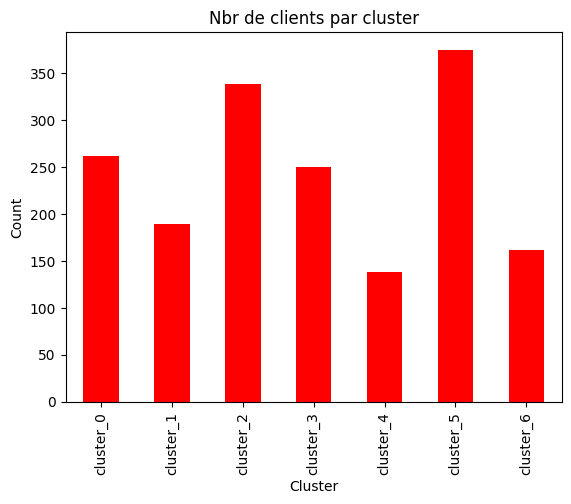

In [41]:
vb_cluster['Count'].plot(kind='bar', color='red', title='Nbr de clients par cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

b. Total dépensé par Cluster

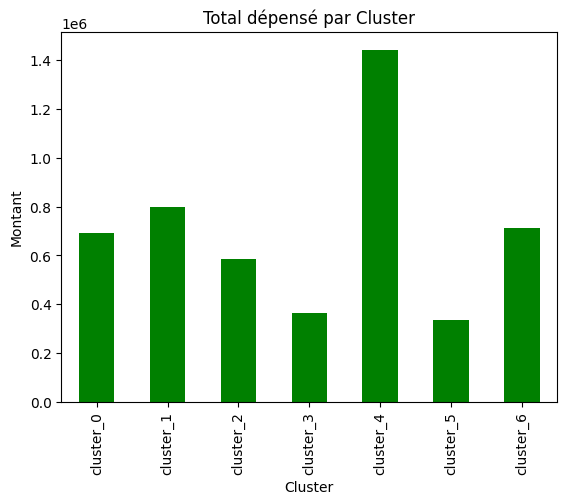

In [42]:
total_depense = cltcluster[["Montant"]].sum()
total_depense['Montant'].plot(kind='bar', color='green', title='Total dépensé par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Montant')
plt.show()

c. Nombre de transaction par Cluster

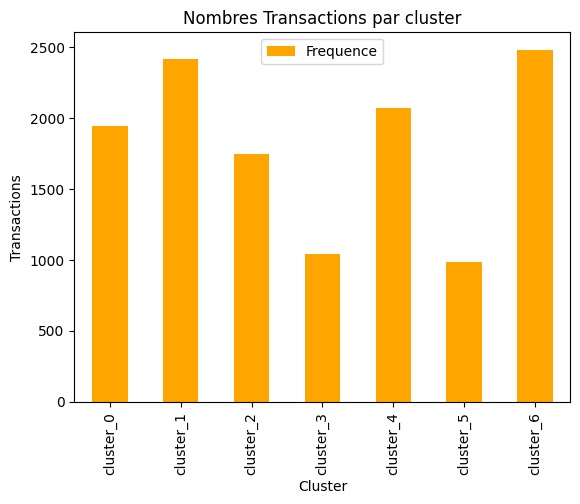

In [43]:
nbr_transaction = cltcluster[["Frequence"]].sum()
nbr_transaction.plot(kind='bar', color='orange', title='Nombres Transactions par cluster')
plt.xlabel('Cluster')
plt.ylabel('Transactions')
plt.show()

d. Panier moyen par Cluster

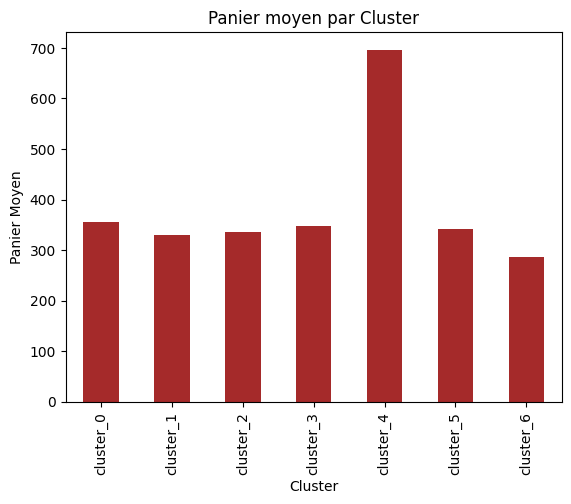

In [44]:
# la somme de montants devise par le nombre de transactions par le cluster
panier_moy = total_depense['Montant'] / nbr_transaction["Frequence"]
panier_moy.plot(kind='bar', color='brown', title='Panier moyen par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Panier Moyen')
plt.show()

e. Pour le cluster qui représente les nouveaux clients, réaliser un graphe qui montre
la comparaison entre le NbrP1 et NbrP2

In [45]:
fn_data["NbrP1"].fillna(0, inplace=True)
fn_data["NbrP2"].fillna(0, inplace=True)
cluster_3 = fn_data.loc[fn_data["Cluster"] == "cluster_3"]
cluster_3

,Customer_ID,Frequence,Recence,Longeur,Montant,NbrP1,NbrP2,Inter_Achat,Cluster
203,206,8,332 days,58 days,3452.0,0.0,8.0,8 days 06:51:25.714285714,cluster_3
206,209,9,373 days,143 days,3436.0,2.0,7.0,17 days 21:00:00,cluster_3
213,216,2,249 days,185 days,142.0,1.0,1.0,185 days 00:00:00,cluster_3
236,239,8,423 days,58 days,2655.0,0.0,8.0,8 days 06:51:25.714285714,cluster_3
246,249,7,354 days,123 days,3986.0,2.0,5.0,20 days 12:00:00,cluster_3
...,...,...,...,...,...,...,...,...,...
1694,1697,6,365 days,141 days,1354.0,1.0,5.0,28 days 04:48:00,cluster_3
1699,1702,3,407 days,153 days,470.0,0.0,3.0,76 days 12:00:00,cluster_3
1703,1706,2,394 days,80 days,541.0,0.0,2.0,80 days 00:00:00,cluster_3
1707,1710,3,413 days,162 days,1155.0,0.0,3.0,81 days 00:00:00,cluster_3


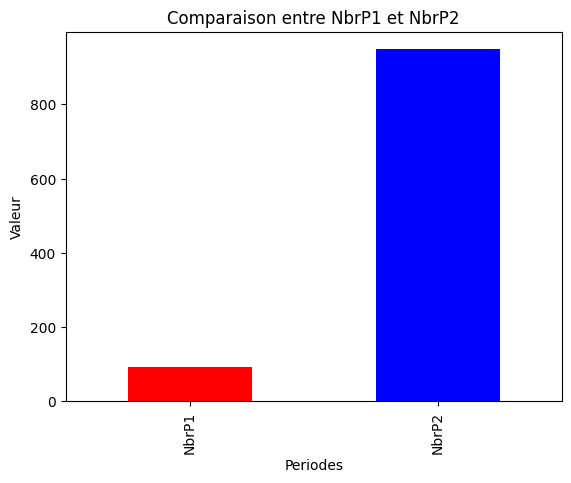

In [46]:
cluster_3[["NbrP1", "NbrP2"]].sum().plot(kind='bar', color=["red","Blue"], title='Comparaison entre NbrP1 et NbrP2')
plt.xlabel('Periodes')
plt.ylabel('Valeur')
plt.show()